NAME: Luuk Teunissen 2013281

# Exam R
Mark Klik & Misja Mikkers

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [2]:
install.packages('gvlma',repos='http://cran.us.r-project.org')

package 'gvlma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\teuni\AppData\Local\Temp\RtmpIdjP8r\downloaded_packages


In [3]:
library(tidyverse)
library(gvlma)

# Assignment 1


## Data

The data are given:


In [26]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

head(df1)

V1,epsilon,response,group
3.588198,-3.3733866,-7.549782,1
8.094746,1.6755741,-11.513918,2
4.680792,0.3067462,-6.054838,1
8.947157,-2.2762739,-17.170587,2
9.464206,2.5076298,-13.420781,2
1.410008,0.8529284,1.032911,1


## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

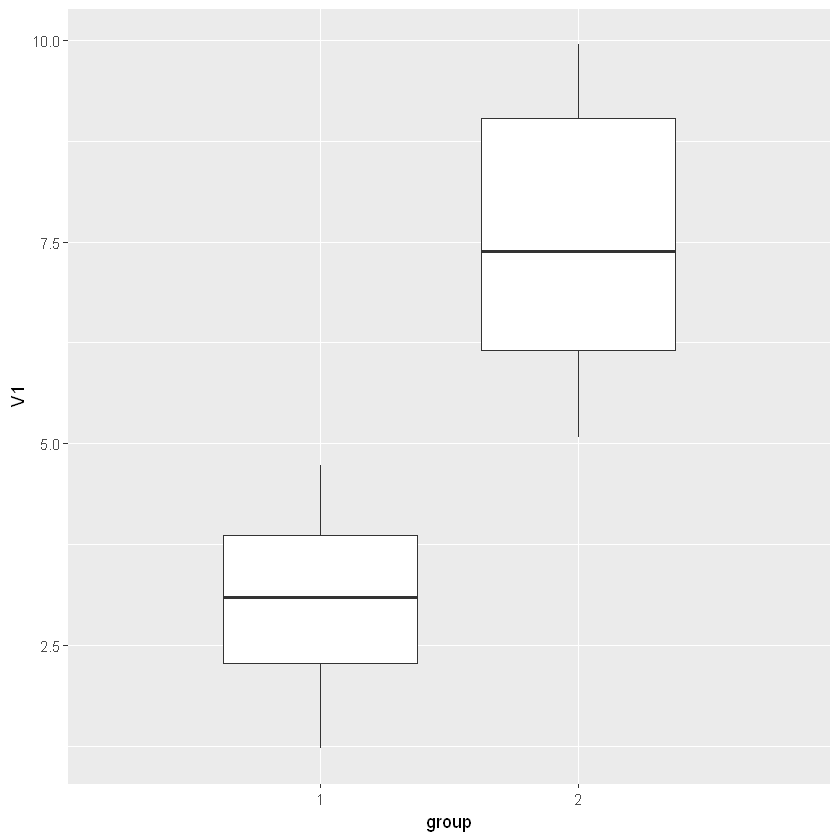

In [28]:
plot <-ggplot(data = df1, aes(group=group,x= group, y = V1)) + 
geom_boxplot() + 
scale_x_discrete(limit = c('1', '2'))
    

plot

to use the data I specified data=df1 and then used geom_boxplot() to create a boxplot off of said data.

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [29]:
reg1 <- lm(data=df1, response ~ V1)
summary(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16


check if the assumptions of linear regression are met with the `gvlma()` function.

In [18]:
gvlma(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
      2.630       -1.915  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.
Heteroscedasticity 0.638869  0.4241 Assumptions acceptable.

Used lm() for the regression and summary to summarize the data. then gvlma() gives the properties of the data, and shows that everything is acceptable.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



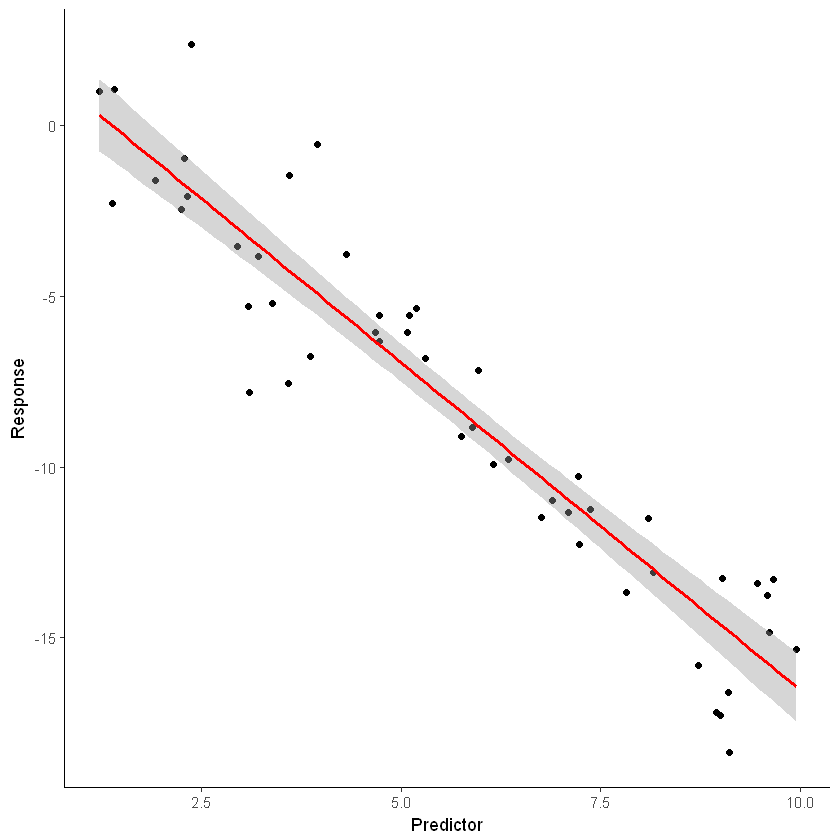

In [31]:
plot <- ggplot(data = df1, aes(y= response, x = V1)) 
plot + geom_point() + geom_smooth(method = "lm", se = TRUE, color="red") + theme_classic() + xlab("Predictor") + ylab("Response")

plotted a scatter plot of df1 using geom_point(). To then make a regression line I used geom_smooth(). for linear regression I then specified method = lm and se=true for a visual confidence interval. to make the line red I specified color=red and used x_label and y_label to name the axis. furthermore I used theme_classic() to give the graph its classical theme.

# Assigment 2

# Packages

In [34]:
library(thematicmaps) #couldnt install this package on my R version?
library(tidyverse)

ERROR: Error in library(thematicmaps): there is no package called 'thematicmaps'


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [25]:
map_municipal <- read.csv2("../Sourcedata/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".")
head(map_municipal)

ERROR: Error in head(map_municipal): object 'map_municipal' not found


to store the csv file into a df I used the read.csv2() command

## Assignment 2b

Now you can make an empty map of the Netherlands.

## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [ ]:
pc4_locations <- 

str(pc4_locations)

## Assignment 2d

### 2di

Read in the school data


In [20]:
schools <- read.csv2("../Sourcedata/schools.csv") #used read.csv2 to read the stored data in school

Warning message in file(file, "rt"):
"cannot open file '../Sourcedata/schools.csv': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [14]:
schools1 <- schools %>%

### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [15]:
school_loc <- 

## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


End of notebook